# Project 3 - Prediction Part

## Importing all i need

In [157]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from config import *
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= client_id,
                                                           client_secret= client_secret))

In [8]:
# importing DataFrames
top_100_df = pd.read_csv(r"/Users/timeisenmenger/Desktop/Ironhack /Project3/Top_100_DataFrame.csv")
spotify_df = pd.read_csv(r"/Users/timeisenmenger/Desktop/Ironhack /Project3/Spotify_DataFrame.csv")

In [5]:
# Checking if dataframe works
top_100_df.head()

,Song Title,Song Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Butter,BTS,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.0,0.0906,0.695,109.997,audio_features,2bgTY4UwhfBYhGT4HUYStN,spotify:track:2bgTY4UwhfBYhGT4HUYStN,https://api.spotify.com/v1/tracks/2bgTY4UwhfBY...,https://api.spotify.com/v1/audio-analysis/2bgT...,164442,4
1,Good 4 U,Olivia Rodrigo,0.556,0.661,6,-5.052,0,0.2040,0.30000,0.0,0.1010,0.668,168.560,audio_features,6PERP62TejQjgHu81OHxgM,spotify:track:6PERP62TejQjgHu81OHxgM,https://api.spotify.com/v1/tracks/6PERP62TejQj...,https://api.spotify.com/v1/audio-analysis/6PER...,178148,4
2,Levitating,Dua Lipa Featuring DaBaby,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.0,0.0674,0.915,102.977,audio_features,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,https://api.spotify.com/v1/tracks/463CkQjx2Zk1...,https://api.spotify.com/v1/audio-analysis/463C...,203064,4
3,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.0,0.4200,0.464,90.030,audio_features,4iJyoBOLtHqaGxP12qzhQI,spotify:track:4iJyoBOLtHqaGxP12qzhQI,https://api.spotify.com/v1/tracks/4iJyoBOLtHqa...,https://api.spotify.com/v1/audio-analysis/4iJy...,198082,4
4,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),0.586,0.616,5,-7.964,1,0.0324,0.18200,0.0,0.0927,0.719,148.088,audio_features,7MAibcTli4IisCtbHKrGMh,spotify:track:7MAibcTli4IisCtbHKrGMh,https://api.spotify.com/v1/tracks/7MAibcTli4Ii...,https://api.spotify.com/v1/audio-analysis/7MAi...,242096,4


In [6]:
# Checking if dataframe works
spotify_df.head()

,Song Title,Song Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Like a Rolling Stone,Bob Dylan,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.1890,0.557,95.263,audio_features,3AhXZa8sUQht0UEdBJgpGc,spotify:track:3AhXZa8sUQht0UEdBJgpGc,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,https://api.spotify.com/v1/audio-analysis/3AhX...,369600,4
1,Smells Like Teen Spirit,Nirvana,0.485,0.863,1,-9.027,1,0.0495,0.000012,0.016200,0.1380,0.767,116.835,audio_features,3oTlkzk1OtrhH8wBAduVEi,spotify:track:3oTlkzk1OtrhH8wBAduVEi,https://api.spotify.com/v1/tracks/3oTlkzk1Otrh...,https://api.spotify.com/v1/audio-analysis/3oTl...,300977,4
2,A Day In The Life - Remastered,The Beatles,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.9220,0.175,163.219,audio_features,3ZFBeIyP41HhnALjxWy1pR,spotify:track:3ZFBeIyP41HhnALjxWy1pR,https://api.spotify.com/v1/tracks/3ZFBeIyP41Hh...,https://api.spotify.com/v1/audio-analysis/3ZFB...,337413,4
3,Good Vibrations (Mono),The Beach Boys,0.398,0.413,1,-10.934,1,0.0388,0.082200,0.000025,0.0891,0.331,133.574,audio_features,5Qt4Cc66g24QWwGP3YYV9y,spotify:track:5Qt4Cc66g24QWwGP3YYV9y,https://api.spotify.com/v1/tracks/5Qt4Cc66g24Q...,https://api.spotify.com/v1/audio-analysis/5Qt4...,219147,4
4,Johnny B Goode,Chuck Berry,0.518,0.756,10,-10.851,1,0.0915,0.735000,0.000062,0.3170,0.968,166.429,audio_features,7MH2ZclofPlTrZOkPzZKhK,spotify:track:7MH2ZclofPlTrZOkPzZKhK,https://api.spotify.com/v1/tracks/7MH2ZclofPlT...,https://api.spotify.com/v1/audio-analysis/7MH2...,160893,4


In [80]:
# Merging the DataFrames to one big DataFrame
all_together_df = pd.concat([top_100_df, spotify_df], axis = 0)
all_together_df = all_together_df.reset_index(drop=True)
all_together_df.head()

,Song Title,Song Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,Butter,BTS,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.0,...,0.695,109.997,audio_features,2bgTY4UwhfBYhGT4HUYStN,spotify:track:2bgTY4UwhfBYhGT4HUYStN,https://api.spotify.com/v1/tracks/2bgTY4UwhfBY...,https://api.spotify.com/v1/audio-analysis/2bgT...,164442,4,0
1,Good 4 U,Olivia Rodrigo,0.556,0.661,6,-5.052,0,0.2040,0.30000,0.0,...,0.668,168.560,audio_features,6PERP62TejQjgHu81OHxgM,spotify:track:6PERP62TejQjgHu81OHxgM,https://api.spotify.com/v1/tracks/6PERP62TejQj...,https://api.spotify.com/v1/audio-analysis/6PER...,178148,4,7
2,Levitating,Dua Lipa Featuring DaBaby,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.0,...,0.915,102.977,audio_features,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,https://api.spotify.com/v1/tracks/463CkQjx2Zk1...,https://api.spotify.com/v1/audio-analysis/463C...,203064,4,0
3,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.0,...,0.464,90.030,audio_features,4iJyoBOLtHqaGxP12qzhQI,spotify:track:4iJyoBOLtHqaGxP12qzhQI,https://api.spotify.com/v1/tracks/4iJyoBOLtHqa...,https://api.spotify.com/v1/audio-analysis/4iJy...,198082,4,4
4,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),0.586,0.616,5,-7.964,1,0.0324,0.18200,0.0,...,0.719,148.088,audio_features,7MAibcTli4IisCtbHKrGMh,spotify:track:7MAibcTli4IisCtbHKrGMh,https://api.spotify.com/v1/tracks/7MAibcTli4Ii...,https://api.spotify.com/v1/audio-analysis/7MAi...,242096,4,0


In [81]:
all_together_df.shape

(10047, 21)

## Starting with Sklearn - Scaling the DataFrame

In [7]:
# Importing different libraries
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [15]:
# Chose which columns need to be scaled
df_to_scale = all_together_df[["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]]
df_to_scale.head()


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.759,0.459,-5.187,0.0948,0.00323,0.0,0.0906,0.695,109.997
1,0.556,0.661,-5.052,0.2040,0.30000,0.0,0.1010,0.668,168.560
2,0.702,0.825,-3.787,0.0601,0.00883,0.0,0.0674,0.915,102.977
3,0.677,0.696,-6.181,0.1190,0.32100,0.0,0.4200,0.464,90.030
4,0.586,0.616,-7.964,0.0324,0.18200,0.0,0.0927,0.719,148.088


In [25]:
# Scaling the DataFrame
scaler = StandardScaler()
scaler.fit(df_to_scale)
scaled = scaler.transform(df_to_scale)
scaled_df = pd.DataFrame(scaled, columns = df_to_scale.columns)
display(scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1.154806,-0.676542,1.035974,0.303241,-0.934664,-0.440221,-0.643013,0.484014,-0.404096
1,-0.062702,0.190373,1.071005,1.740141,-0.019327,-0.440221,-0.575270,0.374366,1.688179
2,0.812944,0.894206,1.399260,-0.153357,-0.917391,-0.440221,-0.794133,1.377440,-0.654898
3,0.663005,0.340581,0.778041,0.621675,0.045444,-0.440221,1.502627,-0.454083,-1.117455
4,0.117225,-0.002751,0.315370,-0.517845,-0.383278,-0.440221,-0.629334,0.581479,0.956778


## Clustering

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

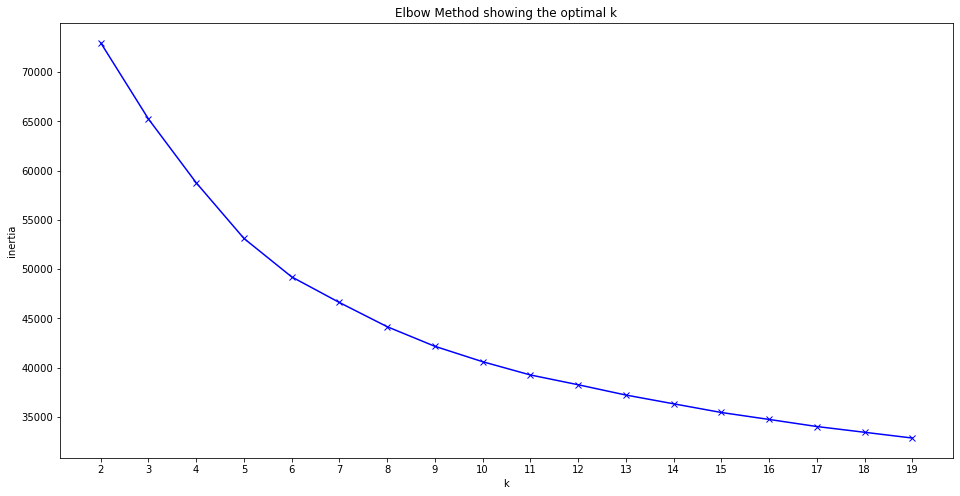

In [22]:
# ElbowMethod
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

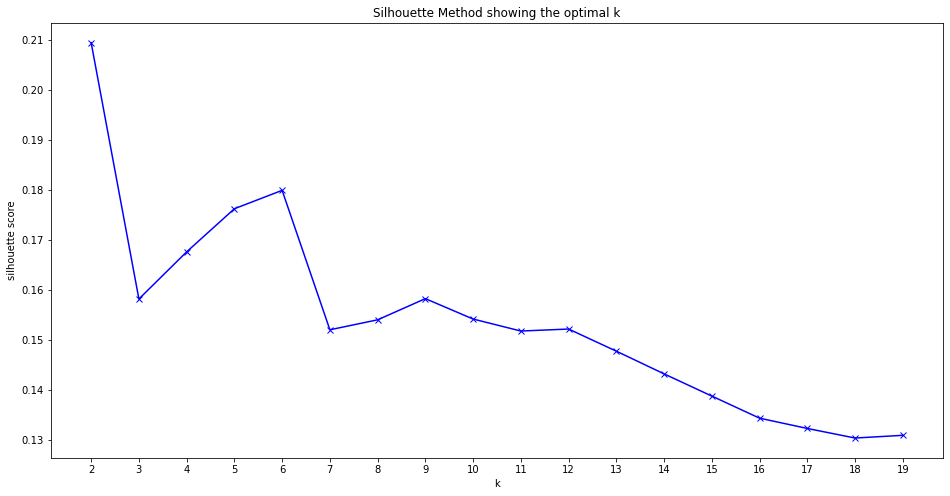

In [40]:
# SilhouetteMethod
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled_df)
    filename = "/Users/timeisenmenger/Desktop/Ironhack /Project3/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    silhouette.append(silhouette_score(scaled_df, kmeans.predict(scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [26]:
scaled_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1.154806,-0.676542,1.035974,0.303241,-0.934664,-0.440221,-0.643013,0.484014,-0.404096
1,-0.062702,0.190373,1.071005,1.740141,-0.019327,-0.440221,-0.575270,0.374366,1.688179
2,0.812944,0.894206,1.399260,-0.153357,-0.917391,-0.440221,-0.794133,1.377440,-0.654898
3,0.663005,0.340581,0.778041,0.621675,0.045444,-0.440221,1.502627,-0.454083,-1.117455
4,0.117225,-0.002751,0.315370,-0.517845,-0.383278,-0.440221,-0.629334,0.581479,0.956778


In [27]:
# after plotting u see that clusters of 6, 9 and 12  are the best
# Going for 9

## Saving with pickle

In [41]:
#scaler = StandardScaler()
#model = KMeans()

with open("/Users/timeisenmenger/Desktop/Ironhack /Project3/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)



## Adding groups to big DataFrame

In [145]:
kmeans = KMeans(n_clusters=9, random_state=1234)
kmeans.fit(scaled_df)

KMeans(n_clusters=9, random_state=1234)

In [ ]:
clusters = kmeans.predict(scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

In [52]:
# Adding cluster column to the overall DataFrame
all_together_df["cluster"] = clusters
all_together_df.head(5)

,Song Title,Song Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,Butter,BTS,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.0,...,0.695,109.997,audio_features,2bgTY4UwhfBYhGT4HUYStN,spotify:track:2bgTY4UwhfBYhGT4HUYStN,https://api.spotify.com/v1/tracks/2bgTY4UwhfBY...,https://api.spotify.com/v1/audio-analysis/2bgT...,164442,4,0
1,Good 4 U,Olivia Rodrigo,0.556,0.661,6,-5.052,0,0.2040,0.30000,0.0,...,0.668,168.560,audio_features,6PERP62TejQjgHu81OHxgM,spotify:track:6PERP62TejQjgHu81OHxgM,https://api.spotify.com/v1/tracks/6PERP62TejQj...,https://api.spotify.com/v1/audio-analysis/6PER...,178148,4,7
2,Levitating,Dua Lipa Featuring DaBaby,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.0,...,0.915,102.977,audio_features,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,https://api.spotify.com/v1/tracks/463CkQjx2Zk1...,https://api.spotify.com/v1/audio-analysis/463C...,203064,4,0
3,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.0,...,0.464,90.030,audio_features,4iJyoBOLtHqaGxP12qzhQI,spotify:track:4iJyoBOLtHqaGxP12qzhQI,https://api.spotify.com/v1/tracks/4iJyoBOLtHqa...,https://api.spotify.com/v1/audio-analysis/4iJy...,198082,4,4
4,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),0.586,0.616,5,-7.964,1,0.0324,0.18200,0.0,...,0.719,148.088,audio_features,7MAibcTli4IisCtbHKrGMh,spotify:track:7MAibcTli4IisCtbHKrGMh,https://api.spotify.com/v1/tracks/7MAibcTli4Ii...,https://api.spotify.com/v1/audio-analysis/7MAi...,242096,4,0


In [51]:
# Adding cluster column to top100 DataFrame
top_100_df["cluster"] = clusters[:100]
top_100_df.head(5)

,Song Title,Song Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,Butter,BTS,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.0,...,0.695,109.997,audio_features,2bgTY4UwhfBYhGT4HUYStN,spotify:track:2bgTY4UwhfBYhGT4HUYStN,https://api.spotify.com/v1/tracks/2bgTY4UwhfBY...,https://api.spotify.com/v1/audio-analysis/2bgT...,164442,4,0
1,Good 4 U,Olivia Rodrigo,0.556,0.661,6,-5.052,0,0.2040,0.30000,0.0,...,0.668,168.560,audio_features,6PERP62TejQjgHu81OHxgM,spotify:track:6PERP62TejQjgHu81OHxgM,https://api.spotify.com/v1/tracks/6PERP62TejQj...,https://api.spotify.com/v1/audio-analysis/6PER...,178148,4,7
2,Levitating,Dua Lipa Featuring DaBaby,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.0,...,0.915,102.977,audio_features,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,https://api.spotify.com/v1/tracks/463CkQjx2Zk1...,https://api.spotify.com/v1/audio-analysis/463C...,203064,4,0
3,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.0,...,0.464,90.030,audio_features,4iJyoBOLtHqaGxP12qzhQI,spotify:track:4iJyoBOLtHqaGxP12qzhQI,https://api.spotify.com/v1/tracks/4iJyoBOLtHqa...,https://api.spotify.com/v1/audio-analysis/4iJy...,198082,4,4
4,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),0.586,0.616,5,-7.964,1,0.0324,0.18200,0.0,...,0.719,148.088,audio_features,7MAibcTli4IisCtbHKrGMh,spotify:track:7MAibcTli4IisCtbHKrGMh,https://api.spotify.com/v1/tracks/7MAibcTli4Ii...,https://api.spotify.com/v1/audio-analysis/7MAi...,242096,4,0


In [84]:
# Adding cluster column to spotify DataFrame
spotify_df["cluster"] = clusters[100:]
spotify_df.head(5)

,Song Title,Song Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,Like a Rolling Stone,Bob Dylan,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,...,0.557,95.263,audio_features,3AhXZa8sUQht0UEdBJgpGc,spotify:track:3AhXZa8sUQht0UEdBJgpGc,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,https://api.spotify.com/v1/audio-analysis/3AhX...,369600,4,8
1,Smells Like Teen Spirit,Nirvana,0.485,0.863,1,-9.027,1,0.0495,0.000012,0.016200,...,0.767,116.835,audio_features,3oTlkzk1OtrhH8wBAduVEi,spotify:track:3oTlkzk1OtrhH8wBAduVEi,https://api.spotify.com/v1/tracks/3oTlkzk1Otrh...,https://api.spotify.com/v1/audio-analysis/3oTl...,300977,4,0
2,A Day In The Life - Remastered,The Beatles,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,...,0.175,163.219,audio_features,3ZFBeIyP41HhnALjxWy1pR,spotify:track:3ZFBeIyP41HhnALjxWy1pR,https://api.spotify.com/v1/tracks/3ZFBeIyP41Hh...,https://api.spotify.com/v1/audio-analysis/3ZFB...,337413,4,4
3,Good Vibrations (Mono),The Beach Boys,0.398,0.413,1,-10.934,1,0.0388,0.082200,0.000025,...,0.331,133.574,audio_features,5Qt4Cc66g24QWwGP3YYV9y,spotify:track:5Qt4Cc66g24QWwGP3YYV9y,https://api.spotify.com/v1/tracks/5Qt4Cc66g24Q...,https://api.spotify.com/v1/audio-analysis/5Qt4...,219147,4,8
4,Johnny B Goode,Chuck Berry,0.518,0.756,10,-10.851,1,0.0915,0.735000,0.000062,...,0.968,166.429,audio_features,7MH2ZclofPlTrZOkPzZKhK,spotify:track:7MH2ZclofPlTrZOkPzZKhK,https://api.spotify.com/v1/tracks/7MH2ZclofPlT...,https://api.spotify.com/v1/audio-analysis/7MH2...,160893,4,7


## Defining the Function for song input

In [268]:
def song_recommendation():
    song_title = ""
    while len(song_title)<3:    
        print("\n")
        song_title = input("Please tell me a song name! Your choice: ")
        
    if top_100_df['Song Title'].str.lower().str.contains(song_title.lower()).any():
        print("\n")
        print("Nice! Your song is HOT right now.")
        print("\n")

        position = top_100_df.loc[top_100_df['Song Title'].str.lower().str.contains(song_title.lower())].sample()
        song_title_cluster = int(position["cluster"])
        interpret = position["Song Artist"]
        song_request = top_100_df[top_100_df["cluster"] == song_title_cluster].sample()

        print("Let's see what else the Top100 has to offer.")
        time.sleep(4)
        print("\n")
        print("Based on your search (", list(position['Song Title'])[0],  "from", list(position["Song Artist"])[0],") my song recommendation for you is" ,list (song_request["Song Title"])[0],  "from",list (song_request["Song Artist"])[0],". Enjoy!")
        print("\n")
    else: 
        print("\n")
        print("Currently your song is not in the Top100 charts.")
        while True:
            print("\n")
            song_artist = input("Please tell me the artist of the song "+ song_title + " : ")
            try:
                results = sp.search(q="track:"+song_title+" artist:"+song_artist,limit=5)
                uri = results['tracks']['items'][0]['uri']
                song = results['tracks']['items'][0]['name']
                audio = sp.audio_features(uri)
                audio_final = pd.DataFrame(audio)[["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]]
                scaled_audio = scaler.transform(audio_final)
                song_cluster = int(kmeans.predict(scaled_audio))
                song_request = spotify_df[spotify_df["cluster"] == song_cluster].sample()

                print("\n")
                print("Based on your search(",song, "from", song_artist, ") my song recommendation is", list(song_request['Song Title'])[0], "from", list(song_request['Song Artist'])[0], ". Enjoy!" )
                break
            except IndexError:
                print("\n")
                print("Sorry, your song is not found.\n")
                print("\n")
                song_title = input("Please tell me a song name! Your choice: ")
                print("\n")
                continue
        

In [273]:
song_recommendation()



Please tell me a song name! Your choice: los yourse


Currently your song is not in the Top100 charts.


Please tell me the artist of the song los yourse : emin


Based on your search( Lose Yourself - From "8 Mile" Soundtrack from emin ) my song recommendation is Adventures of Super Rhymes from Jimmy Spicer . Enjoy!
